In [147]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV  # za hiper-parametare
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from termcolor import colored
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

In [52]:
# ucitavanje i analiza skupa podataka

In [53]:
data = pd.read_csv("Hotel Reservations.csv")

In [54]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [55]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [56]:
data.shape
# 36275 instanci i 19 atributa

(36275, 19)

In [57]:
# proveru oulier-a i normalizaciju vrsimo nakon podele na trening i 
# test skup jer smo inace kompromitovali test skup

In [58]:
#provera nedostajucih vrednosti
data.isna().any().any()

False

In [59]:
data.isna().any()

Booking_ID                              False
no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

In [60]:
# zakljucujemo da u skupu nemamo nedostajuce vrednosti

In [61]:
# kod stabla odlucivanja ne radimo normalizaciju

In [62]:
# prevodjenje u numericki tip

In [63]:
s = data['market_segment_type']
s.replace("Offline", 0, inplace = True)
s.replace("Online", 1, inplace = True)
s.replace("Corporate", 2, inplace = True)
s.replace("Aviation", 3, inplace = True)
s.replace("Complementary", 4, inplace = True)

In [64]:
s = data['type_of_meal_plan']
s.unique()
s.replace("Meal Plan 1", 1, inplace = True)
s.replace("Meal Plan 2", 2, inplace = True)
s.replace("Meal Plan 3", 3, inplace = True)
s.replace("Not Selected", 0, inplace = True)

In [65]:
s = data['room_type_reserved']
s.replace("Room_Type 1", 1, inplace = True)
s.replace("Room_Type 2", 2, inplace = True)
s.replace("Room_Type 3", 3, inplace = True)
s.replace("Room_Type 4", 4, inplace = True)
s.replace("Room_Type 5", 5, inplace = True)
s.replace("Room_Type 6", 6, inplace = True)
s.replace("Room_Type 7", 7, inplace = True)

In [88]:
s = data['Booking_ID']
for i in range(1, 10):
    s.replace("INN0000" + str(i), i, inplace = True)

In [89]:
for i in range(10, 100):
    s.replace("INN000" + str(i), i, inplace = True)

In [90]:
for i in range(100, 1000):
    s.replace("INN00" + str(i), i, inplace = True)

In [91]:
for i in range(1000, 10000):
    s.replace("INN0" + str(i), i, inplace = True)

In [92]:
for i in range(10000, 36276):
    s.replace("INN" + str(i), i, inplace = True)

In [71]:
# podela na ulazne i ciljne atribute:
# informacija o tome da li osoba nece otkazati rezervaciju nalaze
# se u koloni booking_status, to je ciljni atribut
# ostali atributi su ulazni atributi

In [94]:
X = data.drop('booking_status', axis = 1)

In [95]:
feature_names = X.columns

In [96]:
print(feature_names)

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


In [97]:
y = data['booking_status']

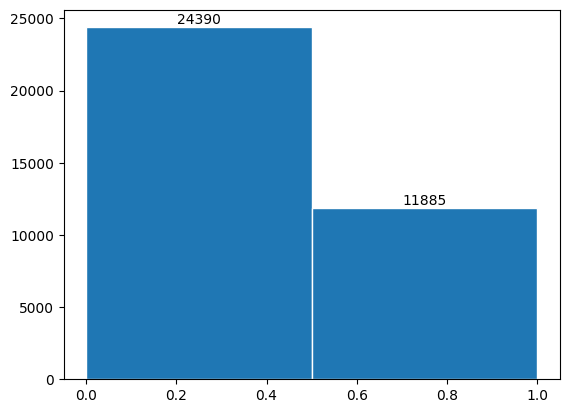

In [98]:
# proveravamo da li su podaci balansirani

freq, bins, _ = plt.hist(y, edgecolor='white', bins=2)

bin_centers = np.diff(bins)*0.5 + bins[:-1] 

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             
               xytext = (0,0.2),            
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )

plt.show()

In [99]:
# na osnovu histograma vidimo da imamo 24390 not_canceled instanci i 
# 11885 canceled instanci => primecujemo blagu nebalansiranost
# URADI DA BUDU BALANSIRANI KASNIJE 9. CAS ?

In [100]:
# not_canceled prestavlja normalno stanje -> 0, 
# a canceled prestavlja abnormalno stanje -> 1
# tj prvoj klasi dodeljujemo 0, a drugoj 1

In [101]:
y.replace("Not_Canceled", 0, inplace = True)

In [102]:
y.replace("Canceled", 1, inplace = True)

In [103]:
# y ima vrednosti 0 i 1 sto znaci da imamo binarnu klasifikaciju

In [104]:
# sada je potrebno da izvrsimo analizu ulaznih atributa

In [105]:
# pocetna analiza
data.describe()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,18138.000000,1.844962,0.105279,0.810724,2.204300,0.949966,0.030986,1.708890,85.232557,2017.820427,7.423653,15.596995,0.804604,0.025637,0.023349,0.153411,103.423539,0.619655,0.327636
std,10471.834844,0.518715,0.402648,0.870644,1.410905,0.480191,0.173281,1.399851,85.930817,0.383836,3.069894,8.740447,0.646881,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9069.500000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,18138.000000,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,27206.500000,2.000000,0.000000,2.000000,3.000000,1.000000,0.000000,1.000000,126.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,36275.000000,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,7.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [107]:
# vrsimo stratifikovanu podelu na trening i test skup

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41, stratify=y)

In [109]:
X_train.shape

(25392, 18)

In [110]:
y_test.shape

(10883,)

In [111]:
# nakon podele na trening i test skup vrsimo proveru outlier-a
# koristicemo IQR algoritam
def IQR(data, feature_names):
    
    iqr = pd.DataFrame(0, index=feature_names, columns=['lower', 'min', 'num_lower', 'upper', 'max', 'num_upper', 'percantage'])
    for name in feature_names:

        (Q1, Q3) = X[name].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        upper = Q3 + (1.5 * IQR)
        lower = Q1 - (1.5 * IQR)
        
        iqr.loc[name, 'upper'] = upper
        iqr.loc[name, 'lower'] = lower

        num_of_out_lower = (X[name] < lower).sum()
        num_of_out_upper = (X[name] > upper).sum()

        percentage = round((num_of_out_lower + num_of_out_upper) / X.shape[0] * 100)

        iqr.loc[name, 'num_lower'], iqr.loc[name, 'num_upper'], iqr.loc[name, 'percantage']  = num_of_out_lower, num_of_out_upper, percentage
        iqr.loc[name, 'min'], iqr.loc[name, 'max'] = min(X[name]), max(X[name])    
    return iqr

In [112]:
IQR(X_train, feature_names)

,lower,min,num_lower,upper,max,num_upper,percantage
Booking_ID,-18136.00,1,0,54412.00,36275,0,0
no_of_adults,2.00,0,7834,2.00,4,2333,28
no_of_children,0.00,0,0,0.00,10,2698,7
no_of_weekend_nights,-3.00,0,0,5.00,7,21,0
no_of_week_nights,-2.00,0,0,6.00,17,324,1
type_of_meal_plan,1.00,0,5130,1.00,3,3310,23
required_car_parking_space,0.00,0,0,0.00,1,1124,3
room_type_reserved,1.00,1,0,1.00,7,8145,22
lead_time,-146.50,0,0,289.50,443,1331,4
arrival_year,2018.00,2017,6514,2018.00,2018,0,18


In [113]:
# DA LI IMAM PUNO AUTLIER-A I DA LI VREDNOSTI ODSKACU PREVISE?

In [114]:
dtc = DecisionTreeClassifier()

In [115]:
# treniranje modela
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [114]:
y_pred = dtc.predict(X_test)

In [115]:
accuracy_score(y_test, y_pred)

0.8539924653128733

In [117]:
# tacnost na test skupu je 0.85 sto vidimo i iz report-a

In [132]:
def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Izvestaj o klasifikaciji za model {} nad {} podacima".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Matrica konfuzije za model {} nad {} podacima ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['Not_Canceled', 'Canceled'], index=['Not_Canceled', 'Canceled']))
    print("---------------------------------------------------------------------------------")
    

def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=['Not_Canceled', 'Canceled'], feature_names=feature_names, filled=True)
    plt.title("Decision tree dubine {} sa {} cvorova".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parameters of model {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")


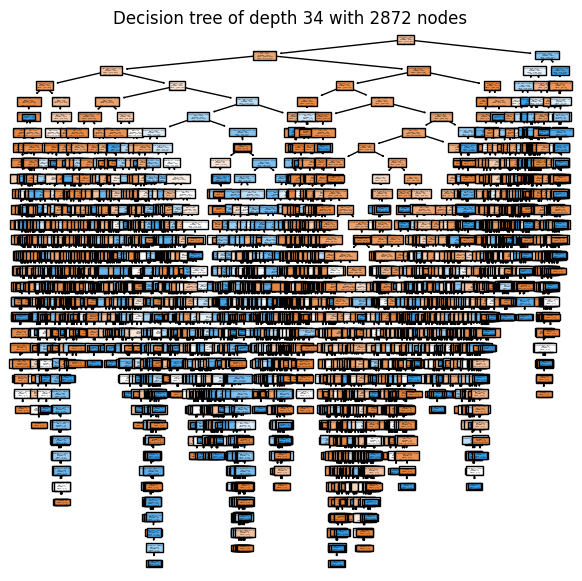

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [122]:
plot_decision_tree(dtc, feature_names)

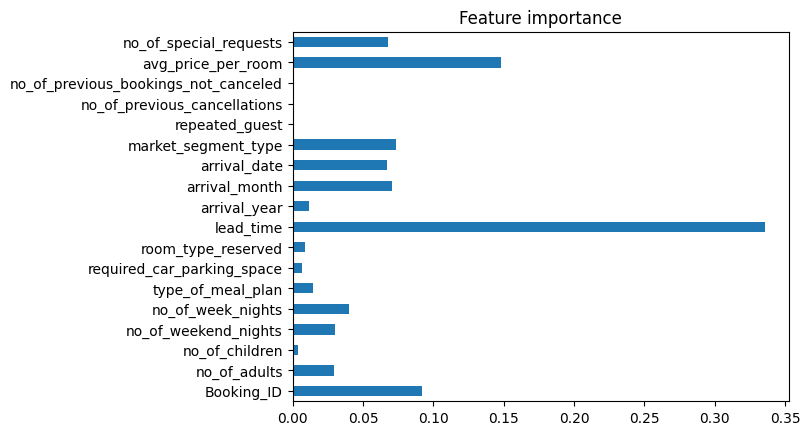

In [119]:
# sad mozemo videti koji atributi su nam bili od najveceg znacaja
# prilikom formiranja stabla odlucivanja
pd.Series(dtc.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [ ]:
# zakljucujemo da se nekoliko atributa, a to su: 
# no_of_previous_bookings_not_canceled, no_of_previous_cancellations, 
#  repeated_guest, ne koristi prilikom klasifikacije

In [118]:
y_train_pred = dtc.predict(X_train)

In [119]:
accuracy_score(y_train, y_train_pred)

1.0

In [ ]:
# vidimo da model na trening skupu ima tacnost 1, samim tim
# mozemo da pretpostavimo da je doslo do preprilagodjavanja i potrebno
# je proveriti koliko dobro nas model klasifikuje nevidjenje instance
# odnosno test skup

In [120]:
report(dtc, X_train, y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17073
           1       1.00      1.00      1.00      8319

    accuracy                           1.00     25392
   macro avg       1.00      1.00      1.00     25392
weighted avg       1.00      1.00      1.00     25392

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
              Not_Canceled  Canceled
Not_Canceled         17073         0
Canceled                 0      8319
---------------------------------------------------------------------------------


In [121]:
report(dtc, X_test, y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7317
           1       0.77      0.78      0.78      3566

    accuracy                           0.85     10883
   macro avg       0.83      0.84      0.83     10883
weighted avg       0.85      0.85      0.85     10883

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
              Not_Canceled  Canceled
Not_Canceled          6504       813
Canceled               776      2790
---------------------------------------------------------------------------------


In [ ]:
# izvestaj klasifikacije nad test skupom nam daje informaciju
# da je tacnost na test skupu 0.89
# iako model ima veliku preciznost, vidimo da se vise pravi gresaka za FN
# pokusacemo da unapredimo model tako sto cemo promeniti hiper-parametre

In [124]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2,4,6, 8]
         }

In [125]:
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=3)

In [127]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

In [128]:
# mozemo videti koja je najbolja kombinacija parametara
estimator.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [ ]:
# koji je najbolji skor
estimator.best_score_

In [133]:
report(estimator.best_estimator_, X_train, y_train)

Izvestaj o klasifikaciji za model DecisionTreeClassifier nad training podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     17073
           1       0.80      0.77      0.79      8319

    accuracy                           0.86     25392
   macro avg       0.85      0.84      0.84     25392
weighted avg       0.86      0.86      0.86     25392

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad training podacima 
---------------------------------------------------------------------------------
              Not_Canceled  Canceled
Not_Canceled         15492      1581
Canceled              1874      6445
---------------------------------------------------------------------------------


In [135]:
report(estimator.best_estimator_, X_test, y_test, "test")

Izvestaj o klasifikaciji za model DecisionTreeClassifier nad test podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      7317
           1       0.79      0.76      0.77      3566

    accuracy                           0.86     10883
   macro avg       0.84      0.83      0.83     10883
weighted avg       0.85      0.86      0.85     10883

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad test podacima 
---------------------------------------------------------------------------------
              Not_Canceled  Canceled
Not_Canceled          6598       719
Canceled               856      2710
---------------------------------------------------------------------------------


In [136]:
estimator.cv_results_

{'mean_fit_time': array([0.04285423, 0.04310211, 0.05113562, 0.0753665 , 0.02293436,
        0.0697581 , 0.05104446, 0.06593768]),
 'std_fit_time': array([0.00509974, 0.01104697, 0.01026827, 0.0282197 , 0.0048976 ,
        0.02049476, 0.00155277, 0.00604937]),
 'mean_score_time': array([0.00810115, 0.00558933, 0.00324281, 0.0035847 , 0.00323534,
        0.00414054, 0.00342369, 0.0034856 ]),
 'std_score_time': array([5.22035921e-03, 2.57901877e-03, 9.20444629e-05, 5.48101215e-05,
        1.81973517e-04, 7.66402084e-04, 2.72491541e-04, 1.11007228e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 4, 6, 8, 2, 4, 6, 8],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
            

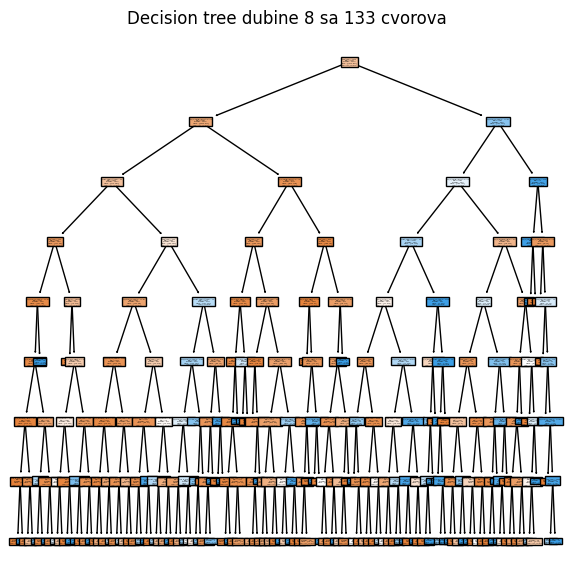

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth 8
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [138]:
plot_decision_tree(estimator.best_estimator_, feature_names)

In [ ]:
# slucajne sume (dugo traje ucitavanje!)

In [151]:
random_forest = RandomForestClassifier(n_estimators=2)
random_forest.fit(X_train, y_train)

report(random_forest, X_test, y_test, "test")

Izvestaj o klasifikaciji za model RandomForestClassifier nad test podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7317
           1       0.88      0.66      0.75      3566

    accuracy                           0.86     10883
   macro avg       0.87      0.81      0.83     10883
weighted avg       0.86      0.86      0.85     10883

---------------------------------------------------------------------------------
Matrica konfuzije za model RandomForestClassifier nad test podacima 
---------------------------------------------------------------------------------
              Not_Canceled  Canceled
Not_Canceled          6998       319
Canceled              1213      2353
---------------------------------------------------------------------------------


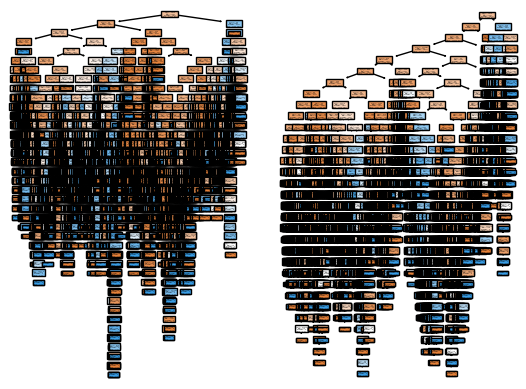

In [152]:
for i in range(1, len(random_forest.estimators_) + 1):
    plt.subplot(1, 2, i)
    plot_tree(random_forest.estimators_[i-1], filled=True)

In [154]:
# pravimo slucajnu sumu koja se sastoji od 100 stabala odlucivanja
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [155]:
report(random_forest, X_train, y_train)

Izvestaj o klasifikaciji za model RandomForestClassifier nad training podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17073
           1       1.00      1.00      1.00      8319

    accuracy                           1.00     25392
   macro avg       1.00      1.00      1.00     25392
weighted avg       1.00      1.00      1.00     25392

---------------------------------------------------------------------------------
Matrica konfuzije za model RandomForestClassifier nad training podacima 
---------------------------------------------------------------------------------
              Not_Canceled  Canceled
Not_Canceled         17073         0
Canceled                 0      8319
---------------------------------------------------------------------------------


In [156]:
report(random_forest, X_test, y_test, "test")

Izvestaj o klasifikaciji za model RandomForestClassifier nad test podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      7317
           1       0.88      0.80      0.84      3566

    accuracy                           0.90     10883
   macro avg       0.89      0.87      0.88     10883
weighted avg       0.90      0.90      0.90     10883

---------------------------------------------------------------------------------
Matrica konfuzije za model RandomForestClassifier nad test podacima 
---------------------------------------------------------------------------------
              Not_Canceled  Canceled
Not_Canceled          6938       379
Canceled               730      2836
---------------------------------------------------------------------------------


In [140]:
# poredjenje dobijenih modela
# za poredjenje cemo koristiti ROC krivu

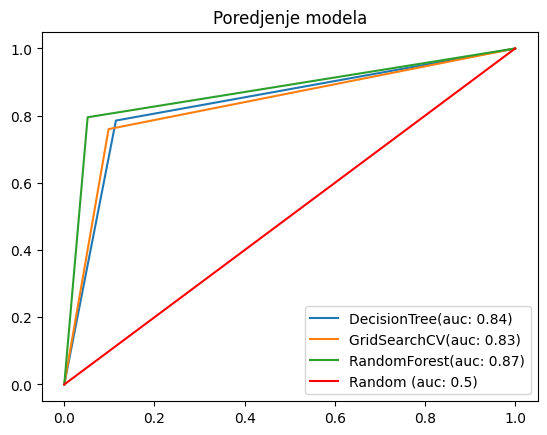

In [157]:
models = [dtc, estimator.best_estimator_, random_forest]
model_names = ['DecisionTree', 'GridSearchCV', 'RandomForest']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poredjenje modela")
plt.legend()
plt.show()


In [ ]:
# biramo model sa najvecom AUC vrednoscu i to je RandomForest